In [5]:
import networkx as nx
from networkx.algorithms import approximation
import numpy as np
import pandas as pd
import urllib.request as urllib
import io
import zipfile
import matplotlib.pyplot as plt

# Viewing the Graph Data:
First lets view the provided graph data i.e. the number of nodes and edges in the graph and their connections

In [6]:
#Loading the football network data url
url = "http://www-personal.umich.edu/~mejn/netdata/football.zip"

In [7]:
#Opening and storing URL data
sock = urllib.urlopen(url)

In [8]:
#Converting the url data into byte format
s = io.BytesIO(sock.read())
sock.close()

In [9]:
#Reading the data of the zip file
zf = zipfile.ZipFile(s) #Creating zip file object from given data
txt = zf.read("football.txt").decode() #Reading the text file data
gml = zf.read("football.gml").decode() #Reading the graph file data

In [10]:
#Cleaning the gml file useless data 
gml = gml.split("\n")[1:]

In [11]:
#Creating a networkX graph from the graph data
G = nx.parse_gml(gml)

In [12]:
#Checking contents of the text file (For info about the network data)
print(txt)

The file football.gml contains the network of American football games
between Division IA colleges during regular season Fall 2000, as compiled
by M. Girvan and M. Newman.  The nodes have values that indicate to which
conferences they belong.  The values are as follows:

  0 = Atlantic Coast
  1 = Big East
  2 = Big Ten
  3 = Big Twelve
  4 = Conference USA
  5 = Independents
  6 = Mid-American
  7 = Mountain West
  8 = Pacific Ten
  9 = Southeastern
 10 = Sun Belt
 11 = Western Athletic

If you make use of these data, please cite M. Girvan and M. E. J. Newman,
Community structure in social and biological networks,
Proc. Natl. Acad. Sci. USA 99, 7821-7826 (2002).

Correction: Two edges were erroneously duplicated in this data set, and
have been removed (21 SEP 2014)



In [18]:
#Checking the nodes of the Graph (First 5 nodes)
list(G.nodes())[:5] 

['BrighamYoung', 'FloridaState', 'Iowa', 'KansasState', 'NewMexico']

In [19]:
#Checking the edges of the Graph (First 5 edges)
list(G.edges())[:5]

[('BrighamYoung', 'FloridaState'),
 ('BrighamYoung', 'NewMexico'),
 ('BrighamYoung', 'SanDiegoState'),
 ('BrighamYoung', 'Wyoming'),
 ('BrighamYoung', 'Utah')]

In [20]:
#Checking the degree of each node in the graph
for n, d in G.degree():
    print("Node: {} ; Degree: {}".format(n, d))

Node: BrighamYoung ; Degree: 12
Node: FloridaState ; Degree: 12
Node: Iowa ; Degree: 12
Node: KansasState ; Degree: 12
Node: NewMexico ; Degree: 11
Node: TexasTech ; Degree: 12
Node: PennState ; Degree: 12
Node: SouthernCalifornia ; Degree: 12
Node: ArizonaState ; Degree: 11
Node: SanDiegoState ; Degree: 11
Node: Baylor ; Degree: 10
Node: NorthTexas ; Degree: 10
Node: NorthernIllinois ; Degree: 10
Node: Northwestern ; Degree: 11
Node: WesternMichigan ; Degree: 10
Node: Wisconsin ; Degree: 12
Node: Wyoming ; Degree: 11
Node: Auburn ; Degree: 11
Node: Akron ; Degree: 11
Node: VirginiaTech ; Degree: 11
Node: Alabama ; Degree: 11
Node: UCLA ; Degree: 11
Node: Arizona ; Degree: 11
Node: Utah ; Degree: 11
Node: ArkansasState ; Degree: 10
Node: NorthCarolinaState ; Degree: 11
Node: BallState ; Degree: 10
Node: Florida ; Degree: 11
Node: BoiseState ; Degree: 9
Node: BostonCollege ; Degree: 11
Node: WestVirginia ; Degree: 11
Node: BowlingGreenState ; Degree: 11
Node: Michigan ; Degree: 11
Node:

In [21]:
#Adding attributes to our graph to visualize it easily
options = {
    "node_color" : "black",
    "node_size" : 50,
    "linewidths" : 0,
    "width" : 0.1,
}

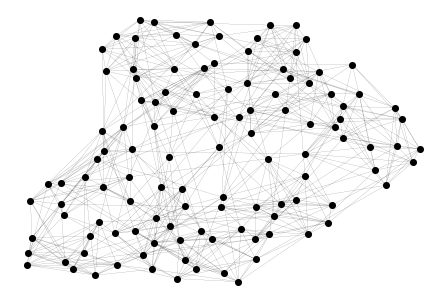

In [22]:
#Visualizing the graph using defined options
nx.draw(G, **options) 
plt.show()

# Node Connectivity:
Checking node connectivity for the given network i.e. for the different nodes of the network

In [24]:
#Computing node connectivity for all the pairs of the Network Graph
approximation.all_pairs_node_connectivity(G)

{'BrighamYoung': {'FloridaState': 12,
  'Iowa': 12,
  'KansasState': 12,
  'NewMexico': 11,
  'TexasTech': 12,
  'PennState': 12,
  'SouthernCalifornia': 12,
  'ArizonaState': 11,
  'SanDiegoState': 11,
  'Baylor': 10,
  'NorthTexas': 10,
  'NorthernIllinois': 10,
  'Northwestern': 11,
  'WesternMichigan': 10,
  'Wisconsin': 12,
  'Wyoming': 11,
  'Auburn': 11,
  'Akron': 11,
  'VirginiaTech': 11,
  'Alabama': 11,
  'UCLA': 11,
  'Arizona': 11,
  'Utah': 11,
  'ArkansasState': 10,
  'NorthCarolinaState': 11,
  'BallState': 10,
  'Florida': 11,
  'BoiseState': 9,
  'BostonCollege': 11,
  'WestVirginia': 11,
  'BowlingGreenState': 11,
  'Michigan': 11,
  'Virginia': 10,
  'Buffalo': 11,
  'Syracuse': 11,
  'CentralFlorida': 8,
  'GeorgiaTech': 11,
  'CentralMichigan': 11,
  'Purdue': 11,
  'Colorado': 11,
  'ColoradoState': 10,
  'Connecticut': 7,
  'EasternMichigan': 11,
  'EastCarolina': 11,
  'Duke': 10,
  'FresnoState': 11,
  'OhioState': 11,
  'Houston': 11,
  'Rice': 11,
  'Idaho':

In [26]:
#Computing node connectivity for a particular node 'BrighamYoung' with 'Iowa'
approximation.local_node_connectivity(G, 'BrighamYoung', 'Iowa')

12

In [27]:
#Computing approximated node connectivity for the overall Network Graph
approximation.node_connectivity(G)

7

# Computing K-components:
Computing K-components of the graph i.e. the components in which a graph can be divided

In [29]:
#Computing k-components for the given Network Graph
k_comps = approximation.k_components(G)

In [30]:
#Viewing the k-components list
k_comps

defaultdict(list,
            {1: [{'AirForce',
               'Akron',
               'Alabama',
               'AlabamaBirmingham',
               'Arizona',
               'ArizonaState',
               'Arkansas',
               'ArkansasState',
               'Army',
               'Auburn',
               'BallState',
               'Baylor',
               'BoiseState',
               'BostonCollege',
               'BowlingGreenState',
               'BrighamYoung',
               'Buffalo',
               'California',
               'CentralFlorida',
               'CentralMichigan',
               'Cincinnati',
               'Clemson',
               'Colorado',
               'ColoradoState',
               'Connecticut',
               'Duke',
               'EastCarolina',
               'EasternMichigan',
               'Florida',
               'FloridaState',
               'FresnoState',
               'Georgia',
               'GeorgiaTech',
               'Hawaii',

In [32]:
#Viewing the total number of components obtained from the Graph
len(list(k_comps))

8

# Computing Clique Values
Cliques in a graph refer to the complete induced subgraphs of a particular given Graph. 

In [34]:
#Computing the maximum clique from the Graph
approximation.max_clique(G)

{'AirForce',
 'BrighamYoung',
 'ColoradoState',
 'NevadaLasVegas',
 'NewMexico',
 'SanDiegoState',
 'Utah',
 'Wyoming'}

In [36]:
#Viewing the size of a large clique in the given Graph
approximation.large_clique_size(G)

9

In [37]:
#Removing cliques from the Network
approximation.clique_removal(G)

({'Alabama',
  'AlabamaBirmingham',
  'ArkansasState',
  'BowlingGreenState',
  'BrighamYoung',
  'Connecticut',
  'Florida',
  'FresnoState',
  'GeorgiaTech',
  'Houston',
  'Iowa',
  'LouisianaTech',
  'Missouri',
  'NorthernIllinois',
  'Purdue',
  'SouthernCalifornia',
  'TexasTech',
  'VirginiaTech',
  'Washington'},
 [{'AirForce',
   'BrighamYoung',
   'ColoradoState',
   'NevadaLasVegas',
   'NewMexico',
   'SanDiegoState',
   'Utah',
   'Wyoming'},
  {'Clemson',
   'Duke',
   'FloridaState',
   'GeorgiaTech',
   'Maryland',
   'NorthCarolina',
   'NorthCarolinaState',
   'Virginia',
   'WakeForest'},
  {'BostonCollege',
   'MiamiFlorida',
   'Pittsburgh',
   'Rutgers',
   'Syracuse',
   'Temple',
   'VirginiaTech',
   'WestVirginia'},
  {'FresnoState',
   'Hawaii',
   'Nevada',
   'Rice',
   'SouthernMethodist',
   'TexasElPaso',
   'Tulsa'},
  {'Indiana', 'Iowa', 'Minnesota', 'Northwestern', 'Wisconsin'},
  {'Colorado', 'IowaState', 'Kansas', 'KansasState', 'Missouri', 'Nebras

# Graph Clustering
Cluster graph refers to the graph of disjoint union of complete graphs to create one Graph Network. Retrieving such complete graphs from a given graph, is termed as "Clustering"

In [38]:
#Computing the average clustering coefficient for the Graph Network
approximation.average_clustering(G)

0.432